<a href="https://colab.research.google.com/github/Rylan-Lewis/Machine-Learning/blob/main/LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math , copy

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
dataset_url = '/content/drive/MyDrive/ML/LinearRegression/Salary_dataset.csv'

In [78]:
df=pd.read_csv(dataset_url)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [79]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

No null values

In [80]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [81]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [82]:
X=df['YearsExperience'].values
Y=df['Salary'].values
print(X)
print(Y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


Text(0.5, 1.0, 'Experience VS Salary')

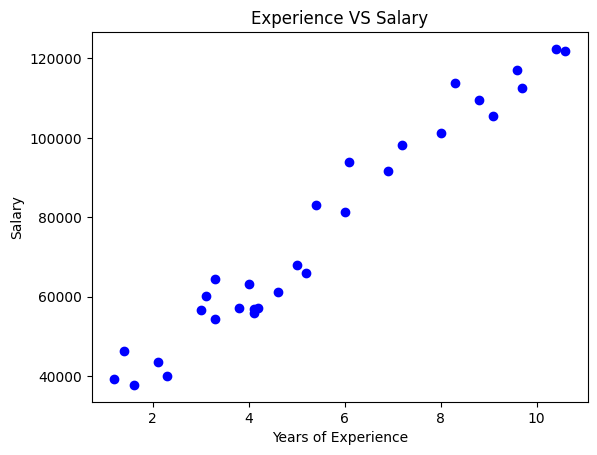

In [83]:
plt.scatter(X,Y,color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience VS Salary")

In [84]:
trained_x , test_x , trained_y , test_y = train_test_split(X,Y,test_size=0.3)

In [85]:
print(trained_x)
print(test_x)
print(trained_y)
print(test_y)

[ 8.   3.3  4.2  1.6  5.4  4.1  9.6  2.3 10.6  9.1  3.3  6.9  7.2  6.
 10.4  3.   4.6  9.7  5.2  8.8  4. ]
[2.1 1.2 1.4 4.1 6.1 3.1 3.8 8.3 5. ]
[101303.  64446.  57082.  37732.  83089.  56958. 116970.  39892. 121873.
 105583.  54446.  91739.  98274.  81364. 122392.  56643.  61112. 112636.
  66030. 109432.  63219.]
[ 43526.  39344.  46206.  55795.  93941.  60151.  57190. 113813.  67939.]


In [86]:
linear_mod = LinearRegression()

In [87]:
Xtrain=trained_x.reshape(-1,1)
linear_mod.fit(Xtrain,trained_y)

LinearRegression()

In [88]:
linear_mod.intercept_

23223.558680024333

#b-parameter=23198.87

In [89]:
linear_mod.coef_

array([9540.6148289])

#w-parameter=9569.82

In [90]:
ypred_train=linear_mod.predict(Xtrain)
Xtest=test_x.reshape(-1,1)
ypred_test=linear_mod.predict(Xtest)

In [91]:
print(ypred_train)
print(trained_y)

[ 99548.47731126  54707.58761541  63294.14096142  38488.54240627
  74742.87875611  62340.07947853 114813.4610375   45166.9727865
 124354.07586641 110043.15362305  54707.58761541  89053.80099946
  91915.98544813  80467.24765345 122445.95290063  51845.40316674
  67110.38689298 115767.52252039  72834.75579033 107180.96917438
  61386.01799564]
[101303.  64446.  57082.  37732.  83089.  56958. 116970.  39892. 121873.
 105583.  54446.  91739.  98274.  81364. 122392.  56643.  61112. 112636.
  66030. 109432.  63219.]


In [92]:
print(ypred_test)
print(test_y)

[ 43258.84982072  34672.29647471  36580.41944049  62340.07947853
  81421.30913634  52799.46464963  59477.89502986 102410.66175993
  70926.63282454]
[ 43526.  39344.  46206.  55795.  93941.  60151.  57190. 113813.  67939.]


In [93]:
# For a random input value
x_test_new=np.array([11.38,6.5,12.72])
X_new=x_test_new.reshape(-1,1)
y_pred_new=linear_mod.predict(X_new)

In [94]:
print(y_pred_new)

[131795.75543295  85237.5550679  144580.17930368]


In [95]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [96]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [97]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [98]:
temp_w= 5000
temp_b=20000

iterations = 100000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(trained_x ,trained_y, temp_w, temp_b, tmp_alpha,iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.77e+08  dj_dw: -2.213e+05, dj_db: -3.075e+04   w:  7.213e+03, b: 2.03075e+04
Iteration 10000: Cost 1.11e+07  dj_dw:  2.507e-06, dj_db: -1.830e-05   w:  9.541e+03, b: 2.32236e+04
Iteration 20000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.32236e+04
Iteration 30000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.32236e+04
Iteration 40000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.32236e+04
Iteration 50000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.32236e+04
Iteration 60000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.32236e+04
Iteration 70000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.32236e+04
Iteration 80000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.32236e+04
Iteration 90000: Cost 1.11e+07  dj_dw:  8.419e-11, dj_db: -1.809e-10   w:  9.541e+03, b: 2.3

In [99]:
print(w_final)
print(linear_mod.coef_)

9540.61482890423
[9540.6148289]


In [100]:
print(b_final)
print(linear_mod.intercept_)

23223.558680023223
23223.558680024333


Therefore, we can seee that the model has fit an accurate line to the data which provides the best value of the w and b parameters which minimizes the cost function

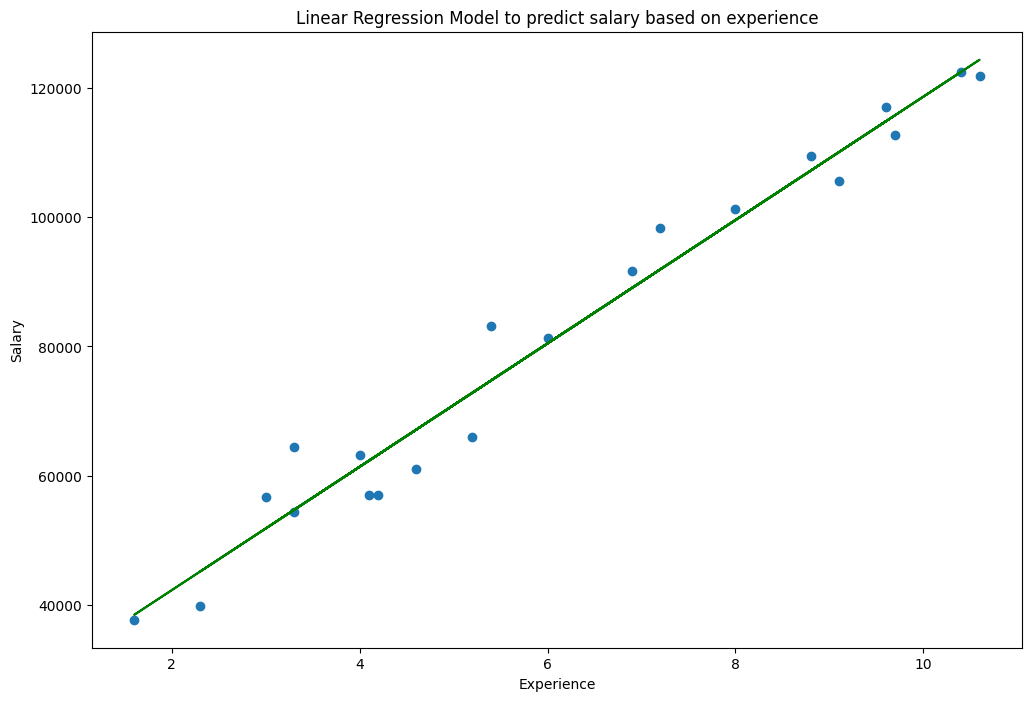

In [101]:
plt.figure(figsize=(12,8))
plt.scatter(trained_x,trained_y)
plt.plot(trained_x,ypred_train, color="green")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Model to predict salary based on experience")
plt.show()

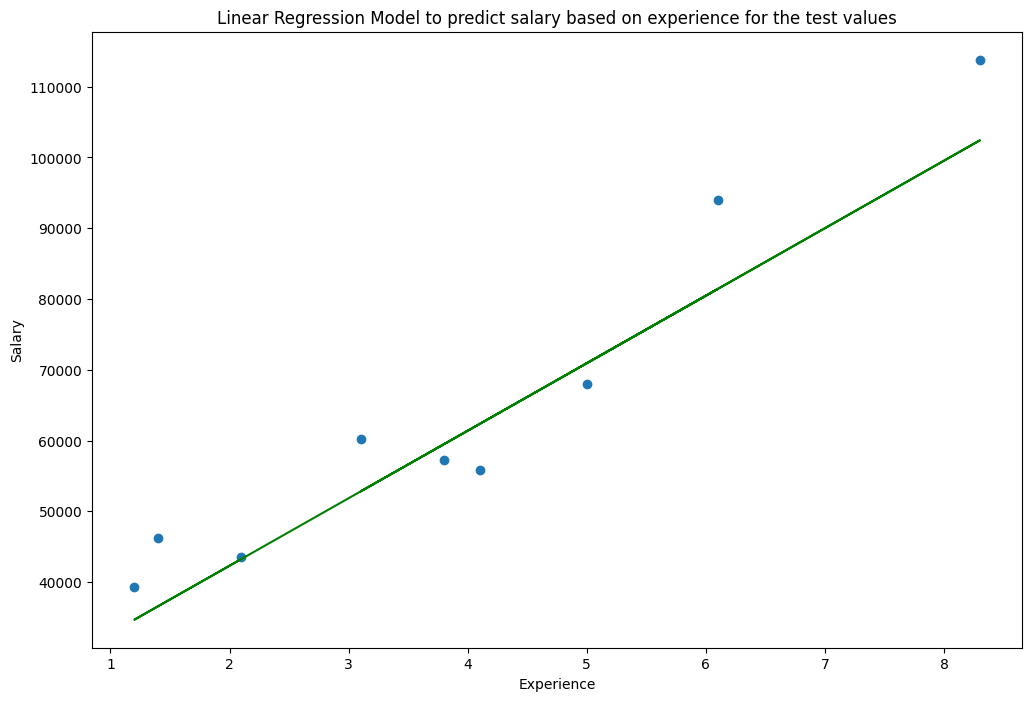

In [102]:
plt.figure(figsize=(12,8))
plt.scatter(test_x,test_y)
plt.plot(test_x,ypred_test, color="green")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Model to predict salary based on experience for the test values")
plt.show()

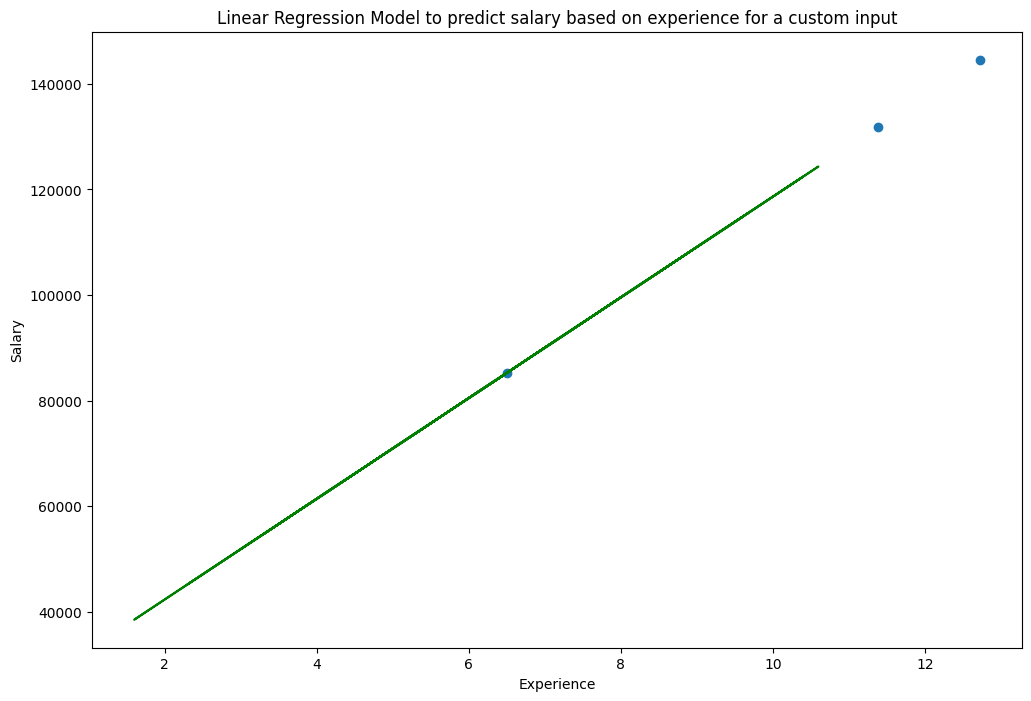

In [104]:
plt.figure(figsize=(12,8))
plt.scatter(x_test_new,y_pred_new)
plt.plot(trained_x,ypred_train, color="green")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Model to predict salary based on experience for a custom input")
plt.show()